# SPRINT 2

¿Los clientes con préstamos e hipotecas tienden a tener un saldo medio más bajo o un mayor riesgo de incumplimiento?

¿Cómo deberíamos ajustar nuestras ofertas y estrategias de gestión de riesgos en función de estos hallazgos?

In [121]:
import pymysql
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

### CONEXIÓN

In [122]:
df_BANK_marketing = pd.read_parquet('df_BANK_marketing_Sprint2.parquet')
df_BANK_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   16163 non-null  int64  
 1   age                  16163 non-null  float64
 2   job                  16163 non-null  object 
 3   marital              16163 non-null  object 
 4   education            16163 non-null  object 
 5   is_in_default        16163 non-null  int64  
 6   balance              16163 non-null  int64  
 7   housing              16163 non-null  int32  
 8   loan                 16163 non-null  int64  
 9   contact              16163 non-null  object 
 10  day                  16163 non-null  int64  
 11  month                16163 non-null  object 
 12  duration             16163 non-null  int64  
 13  campaign             16163 non-null  int64  
 14  pdays                16163 non-null  int64  
 15  previous             16163 non-null 

In [123]:
print(df_BANK_marketing.isnull().sum())
print(f"Los cantidad de duplicados es: {df_BANK_marketing.duplicated().sum()}")


id                     0
age                    0
job                    0
marital                0
education              0
is_in_default          0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
deposit                0
balance_normalizado    0
estado_balance         0
dtype: int64
Los cantidad de duplicados es: 0


Seleccionamos las columnas que útiles para el departamento de finanzas

In [124]:
df_f = df_BANK_marketing[['id','age','job','marital','education','is_in_default','balance','housing','loan','balance_normalizado','estado_balance']]
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16163 entries, 0 to 16162
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   16163 non-null  int64  
 1   age                  16163 non-null  float64
 2   job                  16163 non-null  object 
 3   marital              16163 non-null  object 
 4   education            16163 non-null  object 
 5   is_in_default        16163 non-null  int64  
 6   balance              16163 non-null  int64  
 7   housing              16163 non-null  int32  
 8   loan                 16163 non-null  int64  
 9   balance_normalizado  16163 non-null  float64
 10  estado_balance       16163 non-null  object 
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 1.3+ MB


In [125]:
df_f.head()

,id,age,job,marital,education,is_in_default,balance,housing,loan,balance_normalizado,estado_balance
0,1,59.0,admin.,married,secondary,0,2343,1,0,0.246103,Saldo Alto
1,2,59.0,admin.,married,secondary,0,2343,1,0,0.246103,Saldo Alto
2,3,56.0,admin.,married,secondary,0,45,0,0,-0.445637,Saldo Bajo
3,4,41.0,technician,married,secondary,0,1270,1,0,-0.076890,Saldo Medio Alto
4,5,55.0,services,married,secondary,0,2476,1,0,0.286138,Saldo Alto


In [126]:
df_f.describe()

,id,age,is_in_default,balance,housing,loan,balance_normalizado
count,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,16163.000000,1.616300e+04
mean,9696.799233,41.212337,0.015406,1525.432469,0.471447,0.131411,-2.637664e-17
std,6754.310906,11.918087,0.123163,3322.163567,0.499200,0.337860,1.000031e+00
min,1.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000,-2.520253e+00
25%,4041.500000,32.000000,0.000000,121.000000,0.000000,0.000000,-4.227594e-01
50%,8082.000000,39.000000,0.000000,542.000000,0.000000,0.000000,-2.960308e-01
75%,17342.500000,49.000000,0.000000,1689.000000,1.000000,0.000000,4.923677e-02
max,21383.000000,95.000000,1.000000,81204.000000,1.000000,1.000000,2.398468e+01


Creamos una columna para los clientes que tienen contratados los dos paquetes, Hipoteca y Loan

In [127]:

df_f['hipoteca_y_prestamo'] = ((df_f['housing'] == 1) & (df_f['loan'] == 1)).astype(int)
print(df_f[['housing', 'loan', 'hipoteca_y_prestamo']].head())


   housing  loan  hipoteca_y_prestamo
0        1     0                    0
1        1     0                    0
2        0     0                    0
3        1     0                    0
4        1     0                    0


C:\Users\Adam\AppData\Local\Temp\ipykernel_14696\1576477667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['hipoteca_y_prestamo'] = ((df_f['housing'] == 1) & (df_f['loan'] == 1)).astype(int)


Vemos la cantidad total de cada opción a analizar

In [128]:
print(df_f['hipoteca_y_prestamo'].value_counts())
print(df_f['loan'].value_counts())
print(df_f['housing'].value_counts())

hipoteca_y_prestamo
0    14963
1     1200
Name: count, dtype: int64
loan
0    14039
1     2124
Name: count, dtype: int64
housing
0    8543
1    7620
Name: count, dtype: int64


### EDA

#### PRIMERAS VISUALIZACIONES

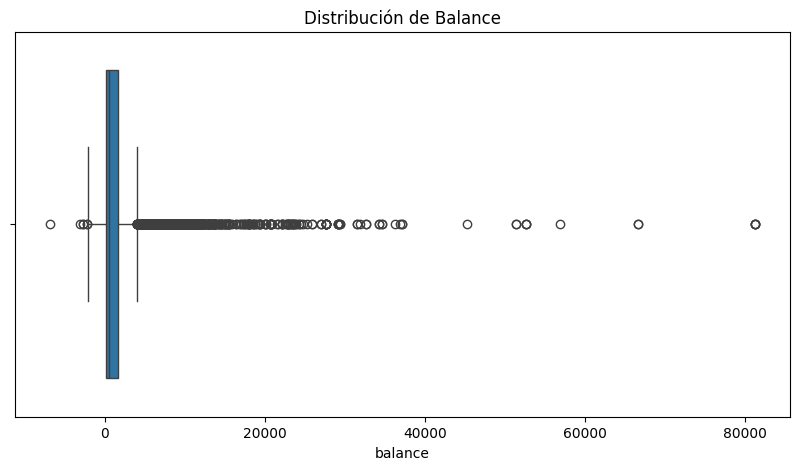

In [129]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_BANK_marketing, x='balance')
plt.title('Distribución de Balance')
plt.show()

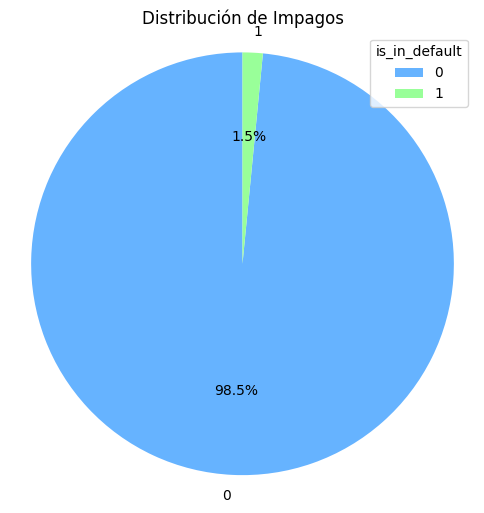

In [130]:
default_counts = df_BANK_marketing['is_in_default'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Impagos')
plt.legend(default_counts.index, title="is_in_default", loc="best")
plt.axis('equal')  
plt.show()


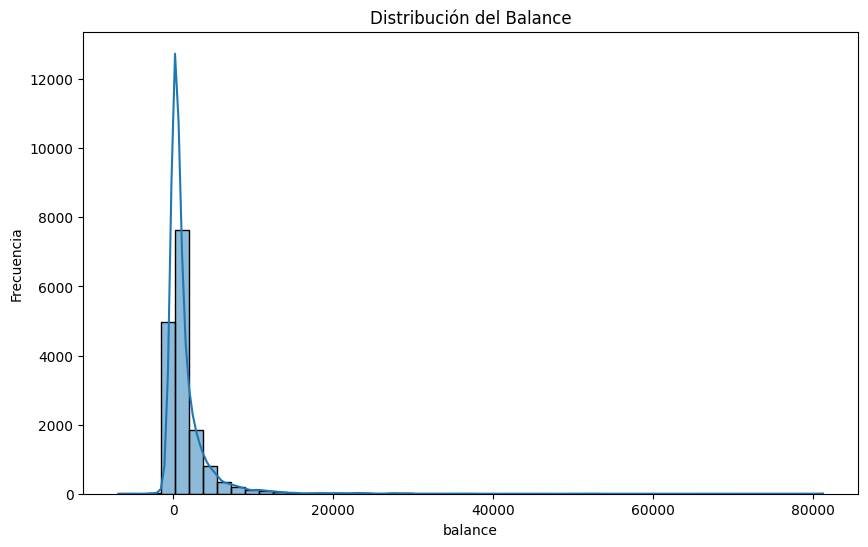

In [131]:
plt.figure(figsize=(10, 6))
sns.histplot(df_f['balance'], bins=50, kde=True)
plt.title('Distribución del Balance')
plt.xlabel('balance')
plt.ylabel('Frecuencia')
plt.show()

<Axes: title={'center': 'Proporción de Hipotecas'}, xlabel='housing'>

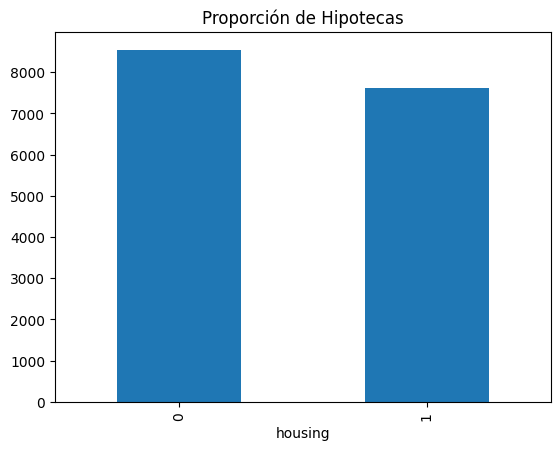

In [132]:
df_f['housing'].value_counts().plot(kind='bar', title='Proporción de Hipotecas')

<Axes: title={'center': 'Proporción de Créditos Personales'}, xlabel='loan'>

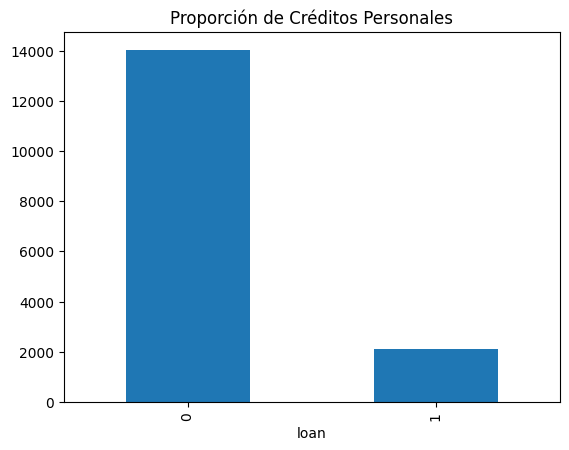

In [133]:
df_f['loan'].value_counts().plot(kind='bar', title='Proporción de Créditos Personales')

#### ACLARACIÓN

En el Data Cleaning, se añadieron dos columnas a la tabla, 'balance_normalizado' y 'estado_balance'. Por lo tanto, es un paso que nos saltaremos en este análisis. Es importante aclararlo poque ha sido necesario añadir estas columnas para poder clasificar los rangos de balance y para poder establacer una relación no azarosa entre las variables.

Se pone el código comentado para ver el proceso

Normalizar la variale balance

In [134]:
#from sklearn.preprocessing import StandardScaler
#from scipy.stats import ttest_ind

# Crear un objeto StandardScaler
#scaler = StandardScaler()

# Normalizar la columna balance
#df_BANK_marketing['balance_normalizado'] = scaler.fit_transform(df_BANK_marketing[['balance']])

# Comprobar los primeros valores para verificar la normalización
#print(df_BANK_marketing[['balance', 'balance_normalizado']].head()) 

Realizamos la prueba T para comprobar la relación entre variables

In [135]:
# Dividir los datos según 'housing'
#grupo_yes = df_BANK_marketing[df_BANK_marketing['housing'] == 1]['balance_normalizado']
#grupo_no = df_BANK_marketing[df_BANK_marketing['housing'] == 0]['balance_normalizado']

# Realizar la prueba T
#from scipy.stats import ttest_ind
#stat, p_value = ttest_ind(grupo_yes, grupo_no, equal_var=False)


#print(f"Estadístico T: {stat}")
#print(f"P-valor: {p_value}")
#if p_value < 0.05:
    #print("Hay una diferencia significativa en los balances normalizados entre los grupos de housing.")
#else:
    #print("No hay evidencia de diferencias significativas entre los grupos de housing.")

Realizamos el quartil para categoriar el balance

In [136]:
#def quartiles(qua):
    # calculamos los rangos de los 3 quartiles
    #q1 = qua.quantile(0.25)
    #q2 = qua.quantile(0.50) 
    #q3 = qua.quantile(0.75)

    #iqr = q3 - q1 #calculamos el IQR interquartilic range

    # esto sirve para ver el quartil minimo y el quartil maximo
    #min_q = q1 - 1.5*iqr
    #max_q = q3 + 1.5*iqr
    
    #return q1, q2, q3, min_q, max_q

#q1, q2, q3, min_q, max_q = quartiles(df_BANK_marketing['balance'])

#print(f"Q1 (Primer cuartil): {q1}")
#print(f"Q2 (Mediana): {q2}")
#print(f"Q3 (Tercer cuartil): {q3}")
#print(f"Mínimo (Outlier mínimo): {min_q}")
#print(f"Máximo (Outlier máximo): {max_q}")

Añadimos el estado de balance al dataset

In [137]:
#def rango_balance(balance):
    #if balance < min_q:
        #return "Saldo Muy Bajo"
    #elif balance < q1:
        #return "Saldo Bajo"
    #elif balance < q2:
        #return "Saldo Medio"
    #elif balance < q3:
        #return "Saldo Medio Alto"
    #elif balance <= max_q:  # Incluye el límite máximo
        #return "Saldo Alto"
    #else:  # Todo lo que sea mayor a max_q
        #return "Saldo Muy Alto"

#df_BANK_marketing['estado_balance'] = df_BANK_marketing['balance'].apply(rango_balance)
#df_BANK_marketing.head()

#### BALANCE

#### HOUSING

##### Distribución de clientes según Housing

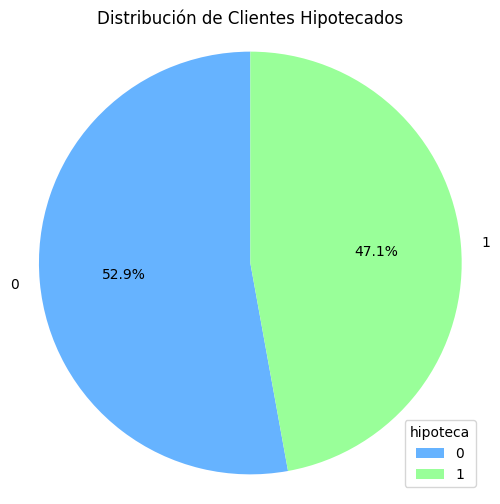

In [138]:
default_counts = df_BANK_marketing['is_in_default'].value_counts()
housing_counts = df_BANK_marketing['housing'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes Hipotecados')
plt.legend(housing_counts.index, title="hipoteca", loc="lower right")
plt.axis('equal')  
plt.show()

##### Media de Balance según Housing

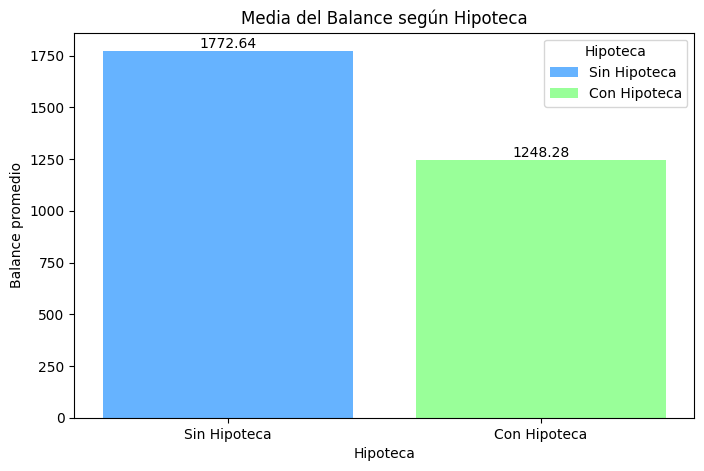

In [139]:
mean_balance = df_f.groupby('housing')['balance'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(mean_balance.index, mean_balance, color=['#66b3ff', '#99ff99'], label=['Sin Hipoteca', 'Con Hipoteca'])
# Añadir valores encima
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',ha='center', va='bottom', fontsize=10, color='black')


plt.title('Media del Balance según Hipoteca')
plt.xlabel('Hipoteca')
plt.ylabel('Balance promedio')
plt.xticks(range(len(mean_balance.index)), ['Sin Hipoteca', 'Con Hipoteca'], rotation=0)
plt.legend(title='Hipoteca', loc='upper right')

plt.show()




#### LOAN

##### Test T 

In [140]:
# Dividir los datos según 'housing'
grupo_si = df_BANK_marketing[df_f['loan'] == 1]['balance_normalizado']
grupo_no = df_BANK_marketing[df_f['loan'] == 0]['balance_normalizado']

# Realizar la prueba T
from scipy.stats import ttest_ind
stat, p_value = ttest_ind(grupo_si, grupo_no, equal_var=False)


print(f"Estadístico T: {stat}")
print(f"P-valor: {p_value}")
if p_value < 0.05:
    print("Hay una diferencia significativa en los balances normalizados entre los grupos de loan.")
else:
    print("No hay evidencia de diferencias significativas entre los grupos de loan.")

Estadístico T: -12.57911433513043
P-valor: 1.624071407299673e-35
Hay una diferencia significativa en los balances normalizados entre los grupos de loan.


Oberservamos que las dos variables no se relacionan por azar

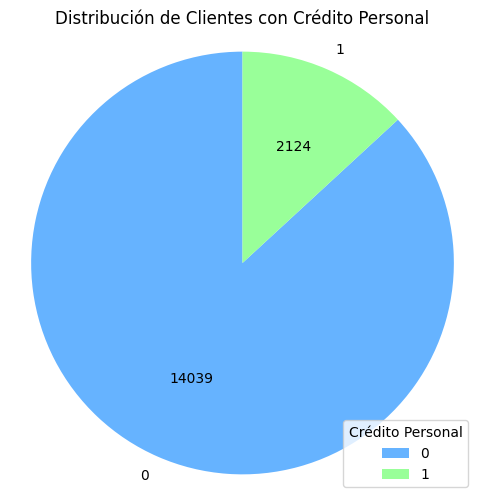

In [158]:
loan_counts = df_BANK_marketing['loan'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(loan_counts, labels=loan_counts.index, autopct=lambda p: '{:.0f}'.format(p * loan_counts.sum() / 100), startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes con Crédito Personal')
plt.legend(loan_counts.index, title="Crédito Personal", loc="lower right")
plt.axis('equal')
plt.show()


##### Distribución de clientes según Loan

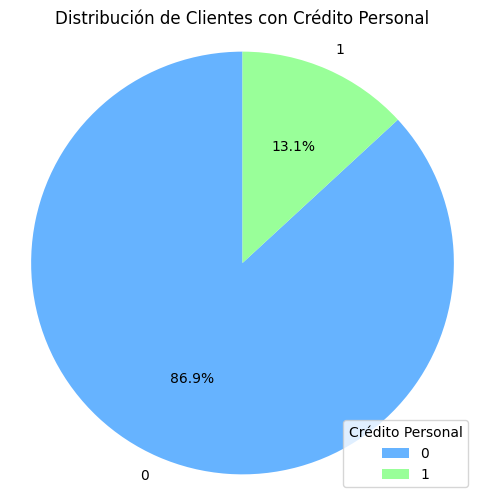

In [141]:
loan_counts = df_BANK_marketing['loan'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes con Crédito Personal')
plt.legend(loan_counts.index, title="Crédito Personal", loc="lower right")
plt.axis('equal')  
plt.show()

##### Media de Balance según Loan

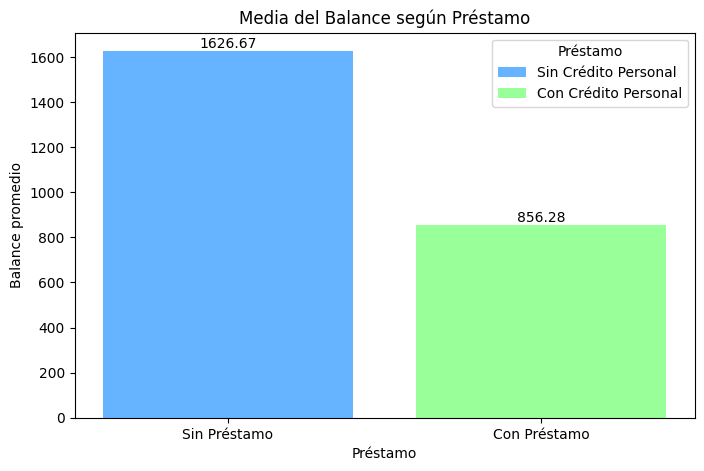

In [142]:
mean_balance = df_f.groupby('loan')['balance'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(mean_balance.index, mean_balance, color=['#66b3ff', '#99ff99'], label=['Sin Crédito Personal', 'Con Crédito Personal'])
# Añadir valores encima
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',ha='center', va='bottom', fontsize=10, color='black')

plt.title('Media del Balance según Préstamo')
plt.xlabel('Préstamo')
plt.ylabel('Balance promedio')
plt.xticks(range(len(mean_balance.index)), ['Sin Préstamo', 'Con Préstamo'], rotation=0)
plt.legend(title='Préstamo', loc='upper right')

plt.show()

#### LOAN + HOUSING

##### Distribución de clientes según si tienen contratados a la vez housing y loan o no.

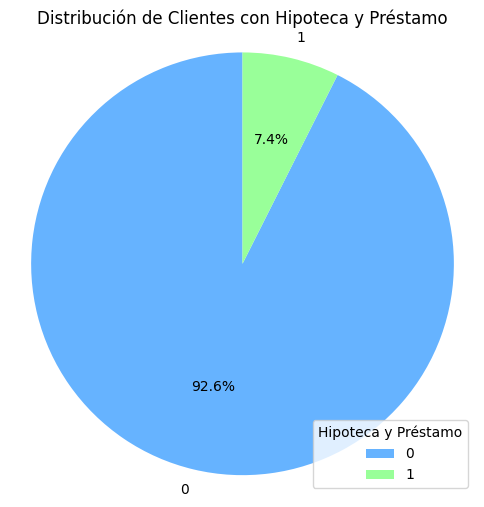

In [143]:
hp_counts = df_f['hipoteca_y_prestamo'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(hp_counts, labels=hp_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribución de Clientes con Hipoteca y Préstamo')
plt.legend(hp_counts.index, title="Hipoteca y Préstamo", loc="lower right")
plt.axis('equal')  
plt.show()

##### Media de Balance según Loan+Housing

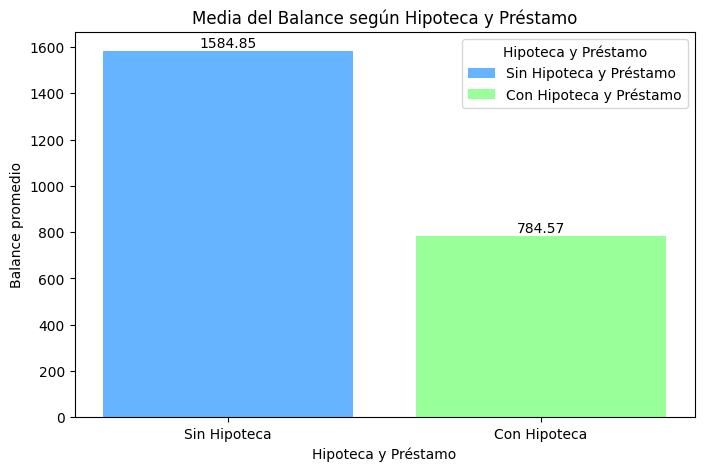

In [144]:
mean_balance = df_f.groupby('hipoteca_y_prestamo')['balance'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(mean_balance.index, mean_balance, color=['#66b3ff', '#99ff99'], label=['Sin Hipoteca y Préstamo', 'Con Hipoteca y Préstamo'])
# Añadir valores encima
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',ha='center', va='bottom', fontsize=10, color='black')


plt.title('Media del Balance según Hipoteca y Préstamo')
plt.xlabel('Hipoteca y Préstamo')
plt.ylabel('Balance promedio')
plt.xticks(range(len(mean_balance.index)), ['Sin Hipoteca', 'Con Hipoteca'], rotation=0)
plt.legend(title='Hipoteca y Préstamo', loc='upper right')

plt.show()

# ANALISIS

In [145]:
df_f['balance'].mean().round(2)

1525.43

In [146]:
df_f['hipoteca_y_prestamo'].value_counts()

hipoteca_y_prestamo
0    14963
1     1200
Name: count, dtype: int64

##### Riesgo de impagos

In [160]:
# Calcular la media del balance por categoría
mean_balance_loan = df_f.groupby('loan')['balance'].mean().round(2)
mean_balance_housing = df_f.groupby('housing')['balance'].mean().round(2)
mean_balance_both = df_f.groupby('hipoteca_y_prestamo')['balance'].mean().round(2)

# Calcular la cantidad de clientes por categoría
count_clients_loan = df_f.groupby('loan').size()
count_clients_housing = df_f.groupby('housing').size()
count_clients_both = df_f.groupby('hipoteca_y_prestamo').size()

# Calcular la cantidad de impagos (is_in_default = 1) por categoría
count_default_loan = df_f[df_f['is_in_default'] == 1].groupby('loan')['is_in_default'].count()
count_default_housing = df_f[df_f['is_in_default'] == 1].groupby('housing')['is_in_default'].count()
count_default_both = df_f[df_f['is_in_default'] == 1].groupby('hipoteca_y_prestamo')['is_in_default'].count()

# Calcular las tablas con porcentajes
crosstab_loan = (pd.crosstab(df_f['loan'], df_f['is_in_default'], normalize='index') * 100).round(2)
crosstab_housing = (pd.crosstab(df_f['housing'], df_f['is_in_default'], normalize='index') * 100).round(2)
crosstab_both = (pd.crosstab(df_f['hipoteca_y_prestamo'], df_f['is_in_default'], normalize='index') * 100).round(2)

# Añadir la media del balance
crosstab_loan['Media Balance'] = mean_balance_loan.values
crosstab_housing['Media Balance'] = mean_balance_housing.values
crosstab_both['Media Balance'] = mean_balance_both.values

# Añadir la cantidad de clientes y cantidad de impagos
crosstab_loan['Cantidad de Clientes'] = count_clients_loan.values
crosstab_housing['Cantidad de Clientes'] = count_clients_housing.values
crosstab_both['Cantidad de Clientes'] = count_clients_both.values

crosstab_loan['Impago'] = count_default_loan.reindex(crosstab_loan.index, fill_value=0).values
crosstab_housing['Impago'] = count_default_housing.reindex(crosstab_housing.index, fill_value=0).values
crosstab_both['Impago'] = count_default_both.reindex(crosstab_both.index, fill_value=0).values

# Renombrar columnas
crosstab_loan.rename(columns={0: 'Sin Impago (%)', 1: 'Con Impago (%)'}, inplace=True)
crosstab_housing.rename(columns={0: 'Sin Impago (%)', 1: 'Con Impago (%)'}, inplace=True)
crosstab_both.rename(columns={0: 'Sin Impago (%)', 1: 'Con Impago (%)'}, inplace=True)

# Reorganizar las columnas para que 'Media Balance' y 'Cantidad de Clientes' sean las primeras
crosstab_loan = crosstab_loan[['Media Balance', 'Cantidad de Clientes', 'Impago', 'Sin Impago (%)', 'Con Impago (%)']]
crosstab_housing = crosstab_housing[['Media Balance', 'Cantidad de Clientes', 'Impago', 'Sin Impago (%)', 'Con Impago (%)']]
crosstab_both = crosstab_both[['Media Balance', 'Cantidad de Clientes', 'Impago', 'Sin Impago (%)', 'Con Impago (%)']]

# Mostrar los resultados
print("Distribución según préstamo:")
print(crosstab_loan)
print("\nDistribución según hipoteca:")
print(crosstab_housing)
print("\nDistribución según hipoteca y préstamo:")
print(crosstab_both)


Distribución según préstamo:
is_in_default  Media Balance  Cantidad de Clientes  Impago  Sin Impago (%)  \
loan                                                                         
0                    1626.67                 14039     159           98.87   
1                     856.28                  2124      90           95.76   

is_in_default  Con Impago (%)  
loan                           
0                        1.13  
1                        4.24  

Distribución según hipoteca:
is_in_default  Media Balance  Cantidad de Clientes  Impago  Sin Impago (%)  \
housing                                                                      
0                    1772.64                  8543     121           98.58   
1                    1248.28                  7620     128           98.32   

is_in_default  Con Impago (%)  
housing                        
0                        1.42  
1                        1.68  

Distribución según hipoteca y préstamo:
is_in_default     

- Podemos ver que los clientes con préstamo tienen más riesgo de impago (4.24%) y por otro lado los clientes con ambos productos a la vez también tienen riesgo de impago (3.17%).

- Los clientes con solo hipoteca, se mueven un poco parecido tanto los que tienen impago como los que no, por lo tanto el riesgo de que tenga impago es bajo.

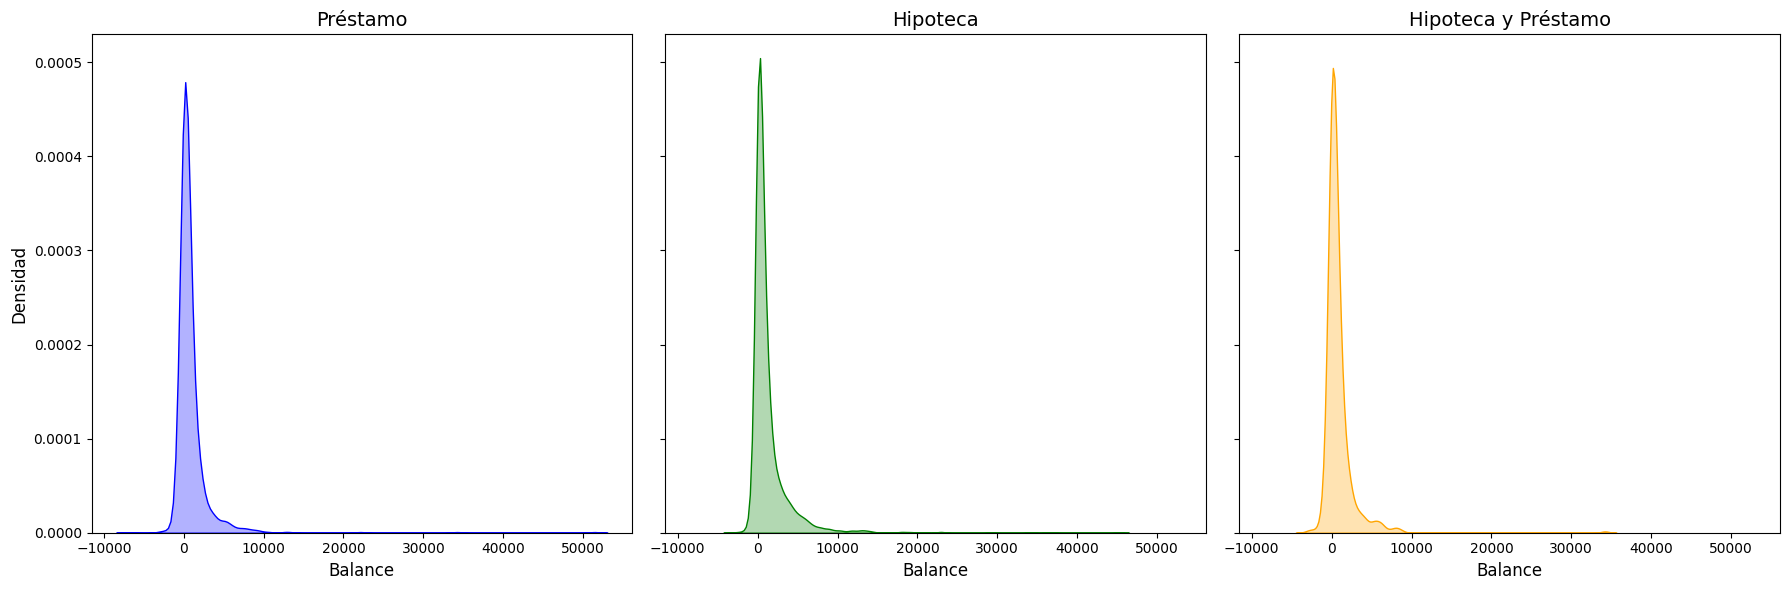

In [148]:
# Configuración del layout para los subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Gráfico para Préstamo
sns.kdeplot(x=df_BANK_marketing[df_BANK_marketing['loan'] == 1]['balance'], 
            fill=True, alpha=0.3, color='blue', ax=axes[0])
axes[0].set_title('Préstamo', fontsize=14)
axes[0].set_xlabel('Balance', fontsize=12)
axes[0].set_ylabel('Densidad', fontsize=12)

# Gráfico para Hipoteca
sns.kdeplot(x=df_BANK_marketing[df_BANK_marketing['housing'] == 1]['balance'], 
            fill=True, alpha=0.3, color='green', ax=axes[1])
axes[1].set_title('Hipoteca', fontsize=14)
axes[1].set_xlabel('Balance', fontsize=12)

# Gráfico para Hipoteca y Préstamo
sns.kdeplot(x=df_BANK_marketing[(df_BANK_marketing['loan'] == 1) & (df_BANK_marketing['housing'] == 1)]['balance'], 
            fill=True, alpha=0.3, color='orange', ax=axes[2])
axes[2].set_title('Hipoteca y Préstamo', fontsize=14)
axes[2].set_xlabel('Balance', fontsize=12)

plt.tight_layout()
plt.show()




- Se observa que los balances de Préstamos, Hipotecas y la combinación de ambos tienen una fuerte tendencia a agruparse cerca de cero, con una expansión hacia valores mayores.

##### Medias de balance por categoría

C:\Users\Adam\AppData\Local\Temp\ipykernel_14696\2098734568.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categoría', y='Media Balance', data=mean_balance_data, palette='viridis')


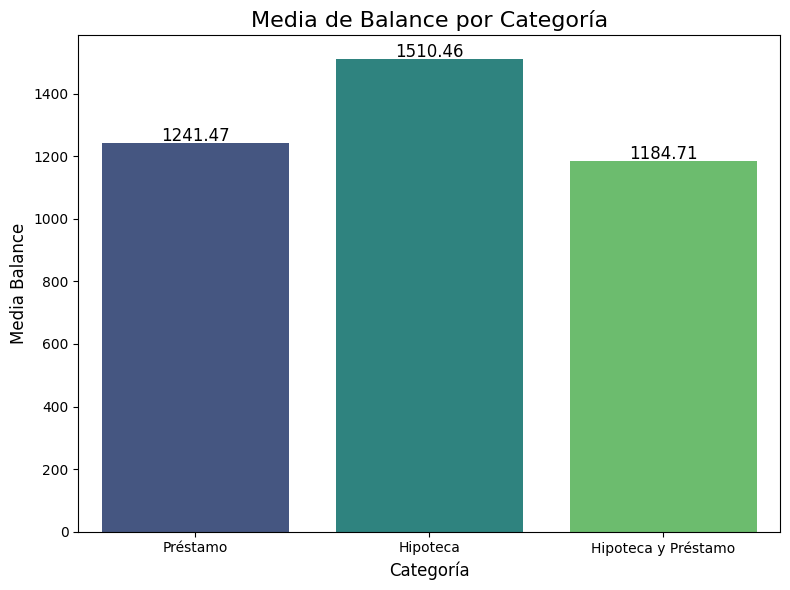

In [149]:
# Crear el DataFrame con las medias
mean_balance_data = pd.DataFrame({
    'Categoría': ['Préstamo', 'Hipoteca', 'Hipoteca y Préstamo'],
    'Media Balance': [
        mean_balance_loan.mean(),  # Media de balance para préstamo
        mean_balance_housing.mean(),  # Media de balance para hipoteca
        mean_balance_both.mean()  # Media de balance para hipoteca y préstamo
    ]
})


plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Categoría', y='Media Balance', data=mean_balance_data, palette='viridis')
# Agregar los números en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')


plt.title('Media de Balance por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Media Balance', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Adam\AppData\Local\Temp\ipykernel_14696\2544950526.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categoría', y='Media Balance', data=mean_balance_data, palette='viridis')


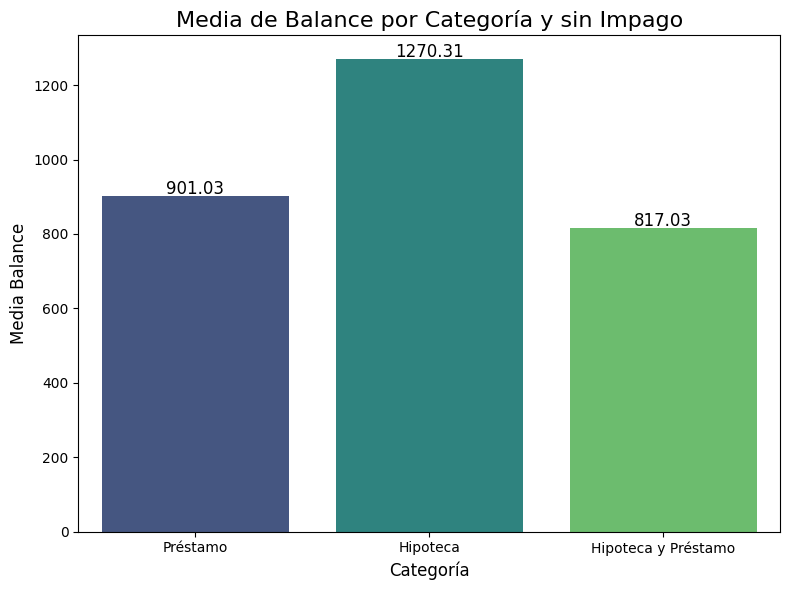

In [165]:
# Filtrar solo clientes en default (is_in_default == 0)
df_f_default_no = df_f[df_f['is_in_default'] == 0]

# Cálculo de las medias para clientes en default
mean_balance_loan = df_f_default_no[df_f_default_no['loan'] == 1]['balance']
mean_balance_housing = df_f_default_no[df_f_default_no['housing'] == 1]['balance']
mean_balance_both = df_f_default_no[(df_f_default_no['loan'] == 1) & (df_f_default_no['housing'] == 1)]['balance']

mean_balance_data = pd.DataFrame({
    'Categoría': ['Préstamo', 'Hipoteca', 'Hipoteca y Préstamo'],
    'Media Balance': [
        mean_balance_loan.mean(),  
        mean_balance_housing.mean(), 
        mean_balance_both.mean()  
    ]
})


plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Categoría', y='Media Balance', data=mean_balance_data, palette='viridis')

# Agregar los números en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Media de Balance por Categoría y sin Impago', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Media Balance', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Adam\AppData\Local\Temp\ipykernel_14696\2938117412.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Categoría', y='Media Balance', data=mean_balance_data, palette='viridis')


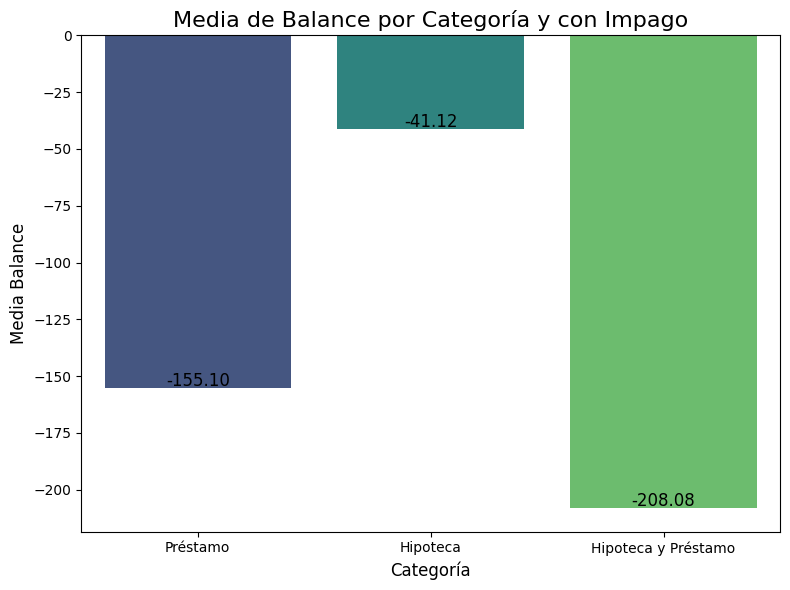

In [150]:
# Filtrar solo clientes en default (is_in_default == 1)
df_f_default_yes = df_f[df_f['is_in_default'] == 1]

# Cálculo de las medias para clientes en default
mean_balance_loan = df_f_default_yes[df_f_default_yes['loan'] == 1]['balance']
mean_balance_housing = df_f_default_yes[df_f_default_yes['housing'] == 1]['balance']
mean_balance_both = df_f_default_yes[(df_f_default_yes['loan'] == 1) & (df_f_default_yes['housing'] == 1)]['balance']

mean_balance_data = pd.DataFrame({
    'Categoría': ['Préstamo', 'Hipoteca', 'Hipoteca y Préstamo'],
    'Media Balance': [
        mean_balance_loan.mean(),  
        mean_balance_housing.mean(), 
        mean_balance_both.mean()  
    ]
})


plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Categoría', y='Media Balance', data=mean_balance_data, palette='viridis')

# Agregar los números en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Media de Balance por Categoría y con Impago', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Media Balance', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#### CONCLUSIONES

Media de Balance por Categoría:

- Los clientes con hipotecas tienen el saldo medio más alto en general y también sin impago, y muestran el menor impacto negativo en caso de impago.

- Los clientes con préstamos tienen un saldo medio inferior en comparación con los de hipotecas, con un impacto significativo en caso de impago.

- Los clientes con hipotecas y préstamos tienen el saldo medio más bajo y el mayor impacto negativo en caso de impago.
Distribución de Clientes según Préstamos:

Sin Préstamo: 98.87% sin impago y 1.13% con impago.

Con Préstamo: 95.76% sin impago y 4.24% con impago.

- Los clientes con préstamos tienen un mayor riesgo de impago en comparación con los que no tienen préstamos.

Distribución de Clientes según Hipotecas:

- Sin Hipoteca: 98.58% sin impago y 1.42% con impago.

- Con Hipoteca: 98.32% sin impago y 1.68% con impago.

- Los clientes con hipotecas tienen un riesgo ligeramente mayor de impago en comparación con los que no tienen hipotecas.

Distribución de Clientes según Hipotecas y Préstamos:

- Sin Hipoteca y Préstamo: 98.59% sin impago y 1.41% con impago.

- Con Hipoteca y Préstamo: 96.83% sin impago y 3.17% con impago.

- Los clientes con ambos productos financieros (hipoteca y préstamo) presentan un mayor riesgo de impago y un saldo medio más bajo.

Estrategias de Gestión de Riesgos y Ofertas

Clientes con Préstamos:

- Intervención Temprana: Implementar programas de asesoría financiera y asistencia.

- Consolidación de Deuda: Ofrecer productos que consoliden préstamos a tasas de interés más bajas.

Clientes con Hipotecas:

- Fidelización: Ofrecer beneficios exclusivos y programas de fidelización.

- Asesoría de Inversiones: Promover servicios de asesoría financiera.

Clientes con Hipotecas y Préstamos:

- Evaluaciones de Riesgo: Realizar evaluaciones de riesgo más estrictas y ofrecer planes de pago personalizados.

- Prevención de Impago: Desarrollar programas preventivos como recordatorios de pagos y reestructuración de deuda.
